In [1]:
from sklearn.datasets import make_blobs, make_moons 
import matplotlib.pyplot as plt

____ Synthetic datasets refer to data that is artificially generated rather than collected from real-world events or observations.______

1. 'make_blobs' is designed to create synthetic datasets suitable for clustering tasks. It generates a specified number of clusters (blobs) with normally distributed points around defined centers.

2. 'make_moons' is used to generates a synthetic dataset with a non-linear structure resembling two interleaving half circles (moons), which makes it ideal for both classification and clustering.


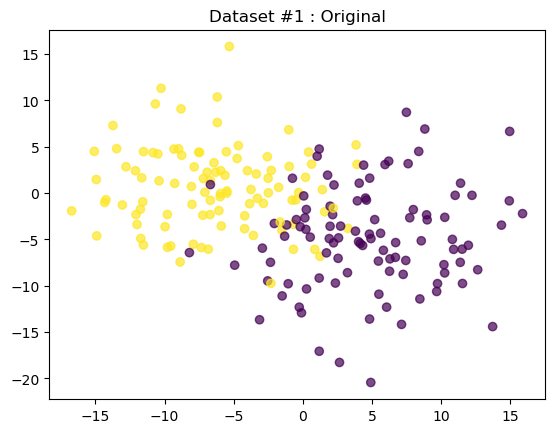

In [2]:
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=5, random_state=123)
plt.scatter(X1[:,0], X1[:,1], c=label1, alpha=0.7)
plt.title('Dataset #1 : Original')
plt.show()

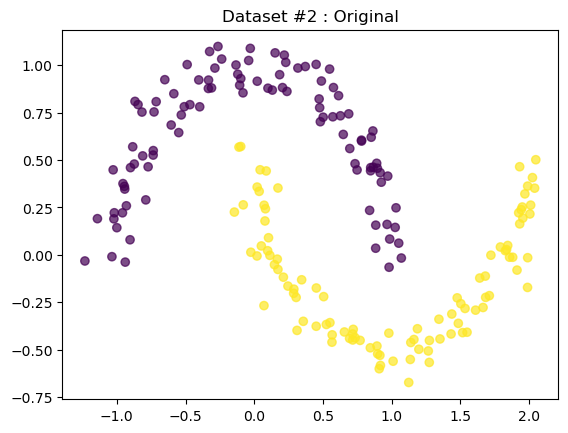

In [3]:
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0], X2[:,1], c=label2, alpha=0.7)
plt.title('Dataset #2 : Original')
plt.show()

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
import numpy as np
import pandas as pd

In [6]:
X1

array([[ 4.83455936e+00,  1.61209639e+00],
       [-7.19342110e+00,  1.57331116e+00],
       [-1.19919003e+01, -3.38784956e+00],
       [ 8.94965320e+00, -2.34628131e+00],
       [ 5.46630481e+00, -7.33334000e+00],
       [-9.82679362e-01,  2.87439331e+00],
       [ 4.82713114e+00, -1.35870919e+01],
       [-5.95639441e+00, -4.86198432e-02],
       [ 3.25723451e+00, -3.81242660e+00],
       [-1.49388489e+01,  1.46494770e+00],
       [-9.32588959e+00,  4.75039194e+00],
       [ 1.23752259e+00, -6.81998526e+00],
       [ 1.19728386e+01, -5.62837526e+00],
       [-2.58199902e-01, -1.23070271e+01],
       [ 1.49590341e+01,  6.65671714e+00],
       [ 2.25314845e-01, -3.91267708e+00],
       [-5.93898363e+00,  2.41971297e+00],
       [-4.66024882e+00,  5.12509843e+00],
       [-2.49261965e+00,  3.07334679e-02],
       [ 7.73413068e+00, -2.65986906e+00],
       [-5.12306455e-01, -7.42476287e-01],
       [ 1.57887480e+00, -2.01725863e+00],
       [-4.20565001e+00, -2.44769569e+00],
       [-4.

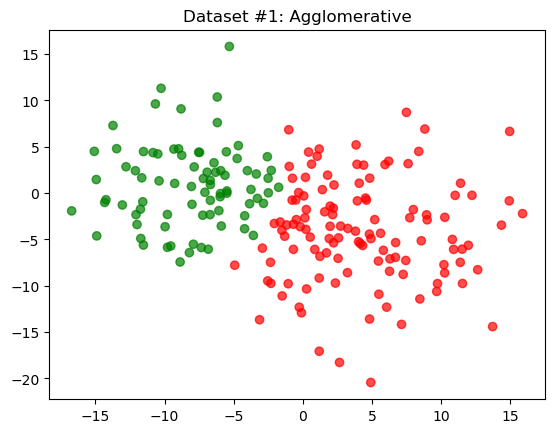

In [7]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors={0:'red', 1:'green'}
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #1: Agglomerative')
plt.show()

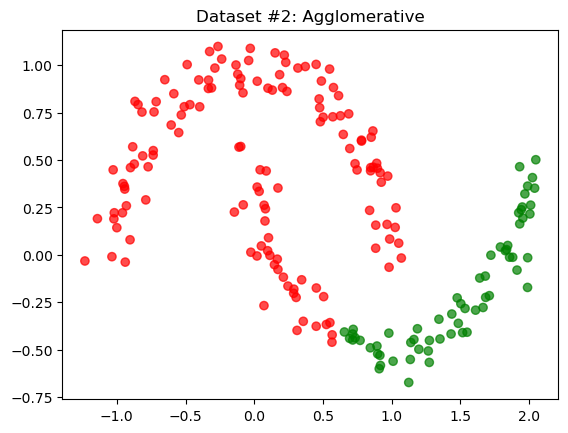

In [8]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

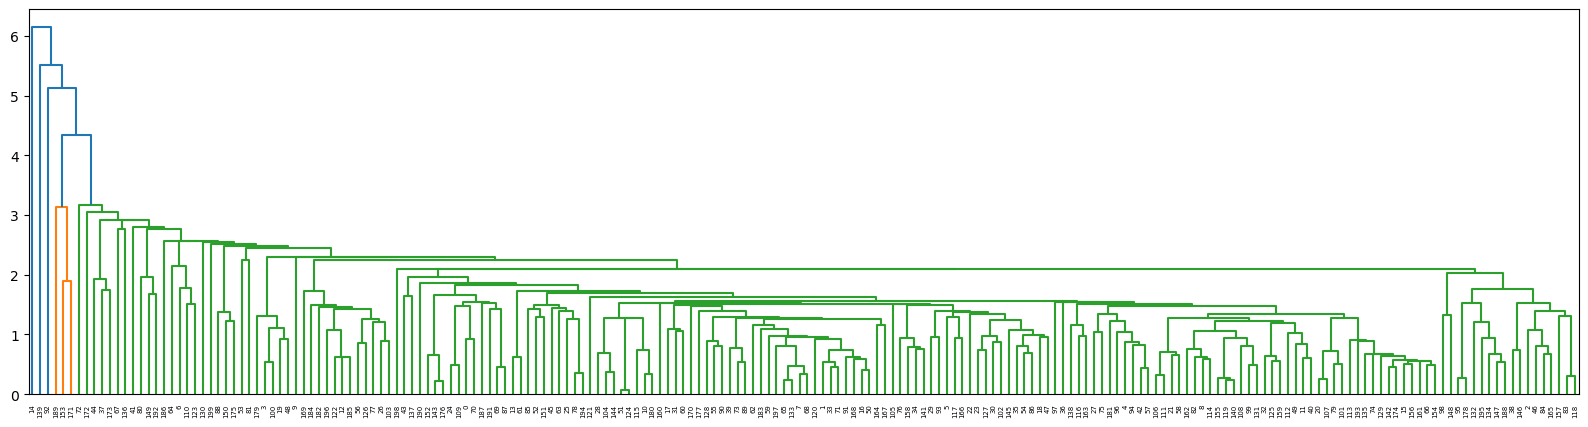

In [10]:
myLinkage = linkage(X1, method='single')
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [16]:
labels = fcluster(myLinkage, 5, criterion='distance')
pd.Series(labels).value_counts()

1    197
4      1
2      1
3      1
Name: count, dtype: int64

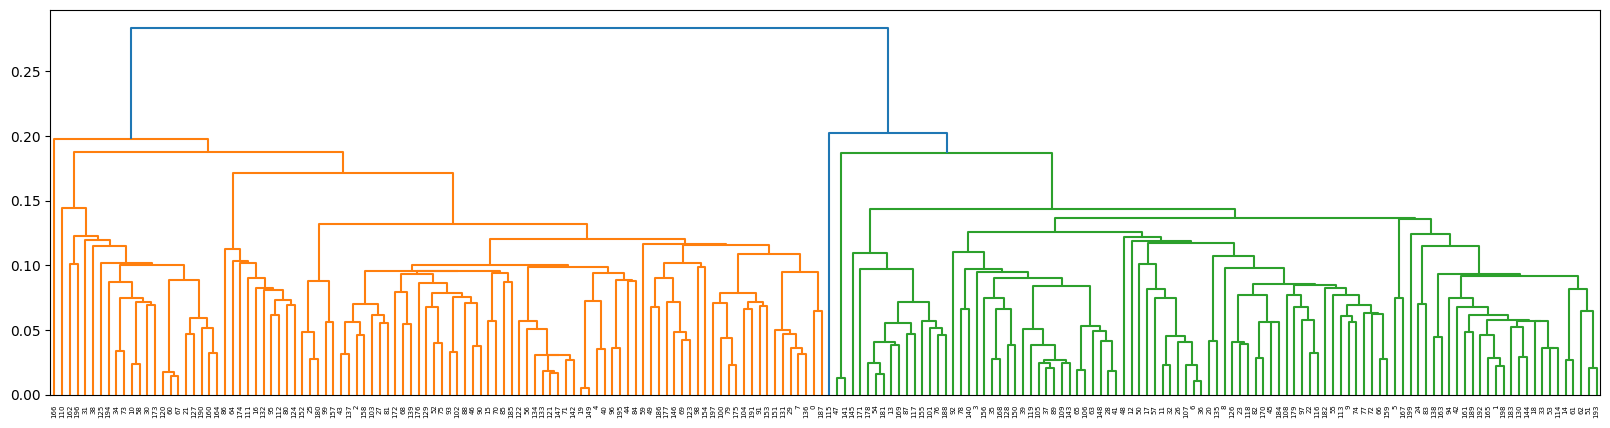

In [20]:
myLinkage = linkage(X2, method='single')
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [21]:
labels = fcluster(myLinkage, 0.23, criterion='distance')
pd.Series(labels).value_counts()

1    100
2    100
Name: count, dtype: int64

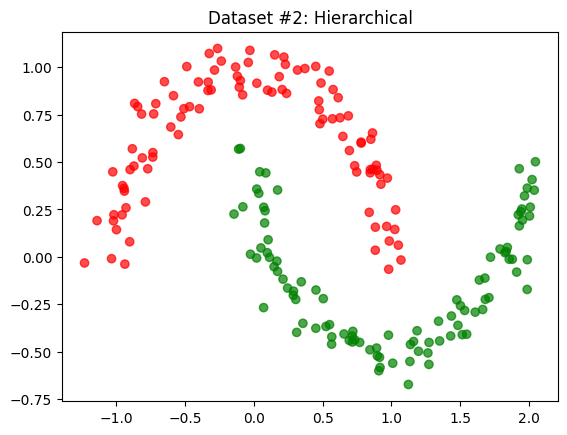

In [23]:
myColors={1:'red', 2:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Hierarchical')
plt.show()

In [17]:
from sklearn.datasets import load_iris

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [19]:
iris=load_iris()

In [20]:
iris_data=iris.data
iris_data_pd=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
iris_data_pd.iloc[:,2:4]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


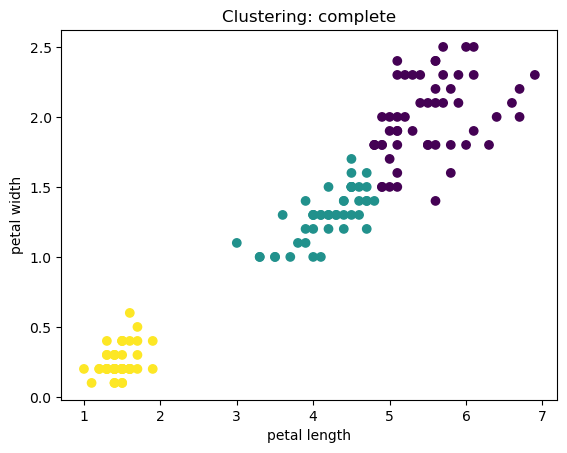

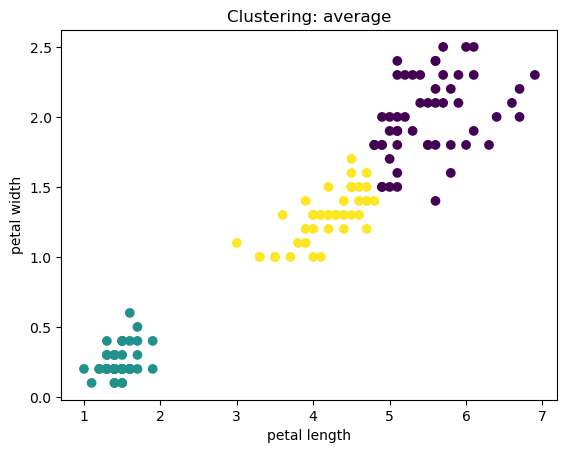

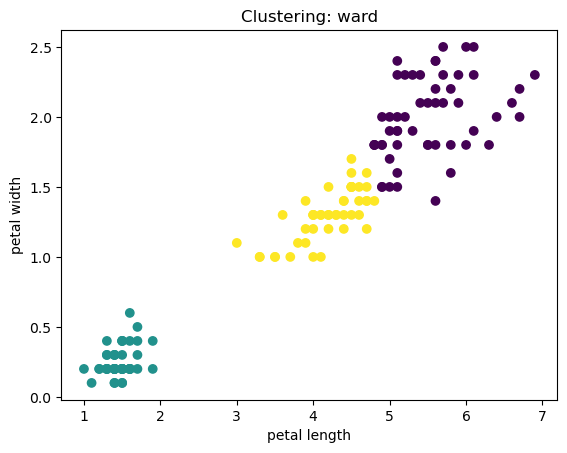

In [22]:
from sklearn.cluster import AgglomerativeClustering
linkage=["complete", "average", "ward"]
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier=AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=i)
    hier.fit(iris_data_pd.iloc[:,2:4])
    plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=hier.labels_)
    plt.title("Clustering: "+ i)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.show()

In [23]:
from scipy.cluster import hierarchy

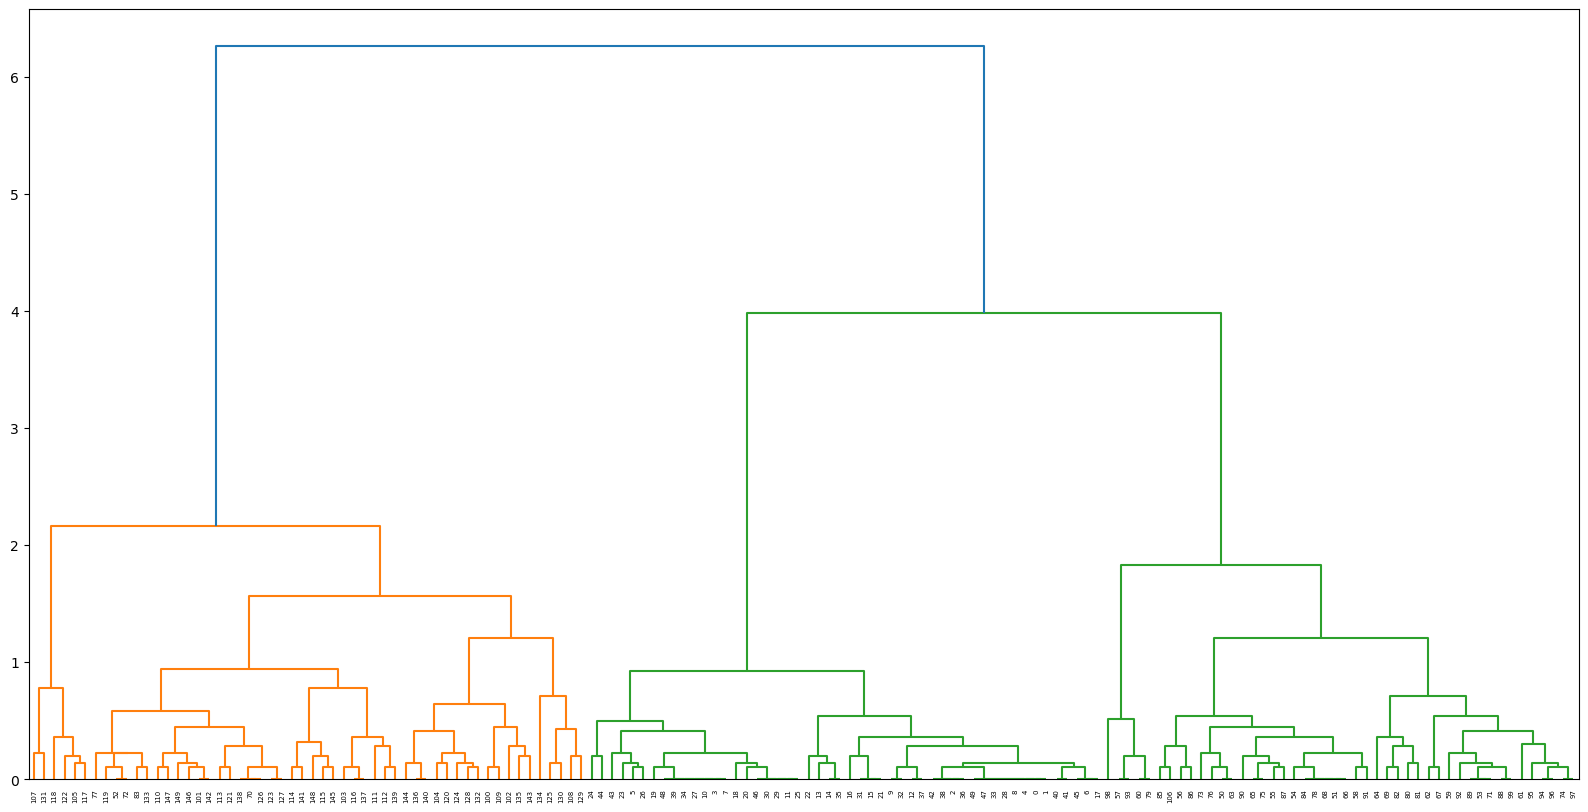

In [24]:
hierar=hierarchy.linkage(iris_data_pd.iloc[:,2:4], 'complete')
plt.figure(figsize=(20,10))
dh=hierarchy.dendrogram(hierar)

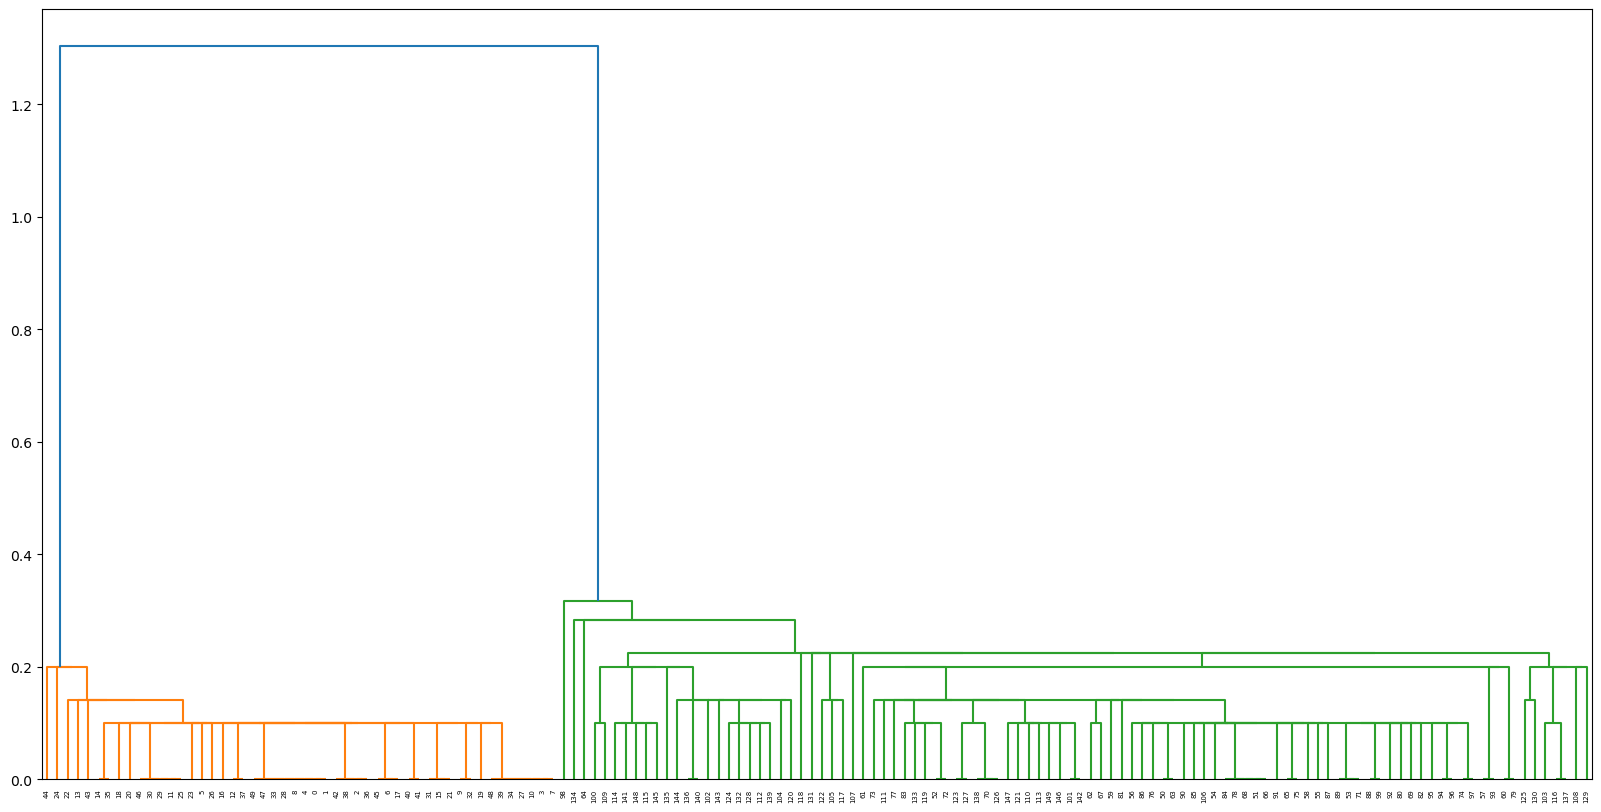

In [25]:
hierar=hierarchy.linkage(iris_data_pd.iloc[:,2:4], 'single')
plt.figure(figsize=(20,10))
dh=hierarchy.dendrogram(hierar)